# Tanque derramado via el Modelo de Wu Y Schroy


## Modelo / REVISAR
Este modelo determina el radio del charco formado por un derrame
 en una superficie lisa.



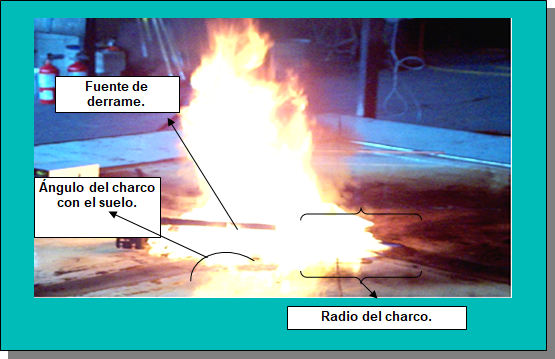

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|t|		Tiempo de derrame|	s|
|Qaf|		Velocidad de derramamiento		|m^3/s|
|C		|Coeficiente experimental		|5	|
|m|		Viscosidad del fluido	|		kg/m*s|
|r|		Densidad del fluido		|kg/m^3|
|g|		Aceleración de la gravedad	|	m/s^2|
|Re	|	Número de Reynolds			||


## Incógnitas


|Variable|Significado|Unidades|
|------|------|------|
|r|		Radio del charco	|	m|
|B|		Coeficiente general.		||
|$\beta$|		Angulo entre superficie del charco y el suelo||		


### Consideraciones
- El valor del coeficiente experimental cambia en función del Re, si éste es menor de 25 toma el valor de 5, si es mayor o igual a 25 toma el valor de 2.



## Desarrollo y ecuaciones

El modelo de Wu y Schroy para el cálculo de un charco producto de la resolución de la ecuación de movimiento y continuidad es la siguiente:

- Ecuación 1.  $r=[\frac{t^3}{C^3\pi ^2/6g}*\frac{pQ^2_{AF}}{\mu}*cos\beta  sin\beta]^\frac{1}{5}$


Debido a que la constante que se encuentra dentro de la ecuación anterior depende del Re, es necesario calcularlo para la extensión de un charco con la ecuación:


- Ecuación 2.  $N_{RE}=\frac{2Q_{AF}\rho }{\pi r\mu}$



Para calcular r se necesita obtener el ángulo entre la superficie del charco con el plano con la ecuación:

- Ecuación 3. $\beta=tan^-1[(0.25+B)^{0.5}-0.5]^{0.5}$


De la misma manera para conseguir el valor de b se necesita del coeficiente B descrito con la ecuación:

- Ecuación 4. $B=\frac{22.489^4\rho}{Q_{AF}\mu}$

## Resultados


In [2]:
#Datos
t=100
Qaf=0.001
mu=0.001
rho=1000
g=9.807


Cálculo de r


In [12]:
#fsolve
import numpy as np
import math
from scipy.optimize import fsolve

def objetivo(r):

   
    
    B=(22.489*r**4*rho)/(mu*Qaf)
    beta=math.atan((((0.25+B)**0.5)-0.5)**0.5)
    Re=(2*Qaf*rho)/(3.1416*r*mu)
    
    if Re<25:
        C=5
    else:
        C=2
        
    r1=(19.6*(t**4)*rho*(Qaf**2)*(math.cos(beta))*(math.sin(beta)))/((C**3)*(3.1416**2)*mu)
   
    
    return r-r1
    
print("r= "+(str(fsolve(objetivo,100)))+"")


r= [64.05099381]


Coeficiente general para obtención del ángulo.

In [8]:
r=float(fsolve(objetivo,100))
B=(22.489*(r**4)*rho)/(mu*Qaf)
print("B= "+str(B))

B= 3.7850675525632454e+17


Obtención del ángulo $\beta$

In [9]:
beta=math.atan((((0.25+B)**0.5)-0.5)**0.5)
print(f"Beta= {beta:.2f}")


Beta= 1.57


In [14]:
Re=(2*Qaf*rho)/(3.1416*r*mu)
print(f"Reynolds= {Re:.2f}")

Reynolds= 9.94


## Respuestas

In [15]:
print(f"Radio del charco (r)= {r:.2f}"+"m")
print(f"Coeficiente general (B)= {B:.2f}")
print(f"Angulo entre superficie del charco y el suelo (beta)= {beta:.2f}")

Radio del charco (r)= 64.05m
Coeficiente general (B)= 378506755256324544.00
Angulo entre superficie del charco y el suelo (beta)= 1.57
